In [446]:
import os
import re
import pandas as pd

In [447]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

## Načtení a spojení dat

In [448]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [449]:
len(df)

47419

In [450]:
df

,rok,titul,autorstvo,autorstvo_kod
001,,,,
cpk20041494224,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049
bknjje05009,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422
bknjaj17284,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None
nkc20051626328,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969
cpk20162825404,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522
...,...,...,...,...
nkc20243601181,2024.0,Slon v šuplíku,Nejedlý Jan,ola2003165587
nkc20243601189,2024.0,Kampak jedou Pepa s Edou?,Hegerová Vendula,ola2003204967
nkc20243601266,2024.0,Isabela a červené šípky,Peroutková Ivana,jn20000401963


In [451]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))

In [452]:
autority = autority.merge(pd.read_json(os.path.join('data_raw','wikidata_raw.json')), left_index=True, right_index=True, how="outer")

In [453]:
autority

,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti
aun2006372164,None,None,None,None,[aun2006372164],"[Ibn Ezra, Abraham,]",[asi 1092-1167.],[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN
aun2006372165,None,None,None,None,[aun2006372165],"[Abu Jusuf Jakub ben Ibrachim al-Kufi,]",[731-798.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nz a22 n 4500,NaN,NaN,NaN
aun2006372166,None,None,None,None,[aun2006372166],"[Abū al-Fatḥ ibn-Abī al-Ḥasan,]",[činný 14. století.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN
aun2006372167,None,None,None,None,[aun2006372167],"[Abū Maʿšar,]",[787-886.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Významné dílo arabské astrologie. Po světě ší...,None,cz a22 n 4500,NaN,NaN,NaN
aun2006372168,None,None,None,None,[aun2006372168],"[Adalwin,]",[činný 9. století.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zmp20241237237,None,None,[1969],None,[zmp20241237237],"[Comoglio, Silvia,]",[1969-],[1],None,None,None,[Itálie],None,"[italská poezie, literární činnost]",None,"[spisovatelky, básnířky]",[žena],[ita],None,None,None,None,None,None,None,None,None,None,None,None,[Italská spisovatelka a básnířka.],None,nz a22 n 4500,NaN,NaN,NaN
zmp20241237239,None,None,None,None,[zmp20241237239],"[Friedman, Neile Sue]",None,[1],None,None,None,[Spojené státy americké],None,"[holocaust (1939-1945), perzekuce, přeživší ho...",None,[soudkyně],[žena],[eng],None,None,None,None,None,None,None,None,None,None,None,None,[Americká soudkyně.],None,nz a22 n 4500,NaN,NaN,NaN
zmp20241237241,[isni],[0000000497681884],[1928],[2012],[zmp20241237241],"[Ayalon, Eliezer,]",[1928-2012],[1],None,None,None,"[Polsko, Izrael]",None,None,None,[průvodci],[muž],"[pol, eng]","[Ayalon, Eli,]",[1928-2012],None,[1],None,None,None,None,None,None,None,None,[Polsko-izraelský průvodce a přeživší holocaust.],None,cz a22 n 4500,NaN,NaN,NaN
zmp20241237246,"[isni, wikidata]","[0000000109154514, Q7299117]",[1915],[1995],[zmp20241237246],"[Rosenthal, Raymond,]",[1915-1995],[1],None,None,None,[Spojené státy americké],None,"[překladatelská činnost, překlady z italštiny]",None,[překladatelé],[muž],"[eng, ita]",None,None,None,None,None,None,None,None,None,None,None,None,[Americký překladatel.],None,nz a22 n 4500,NaN,NaN,NaN


In [454]:
df = df.merge(autority, left_on="autorstvo_kod", right_index=True, how="left")

In [455]:
len(df)

47419

In [456]:
def dva_letopocty(y, z):
    try:
        return int(re.search(r'\d{4}',str(y)).group(0))
    except:
        return z

In [457]:
df['narozeni'] = df.apply(lambda row: dva_letopocty(row['046_f'], row['w_narozeni']), axis=1)

In [458]:
df['umrti'] = df.apply(lambda row: dva_letopocty(row['046_g'], row['w_umrti']), axis=1)

In [459]:
df['vek'] = df['rok'] - df['narozeni']

Kolik lidí má uvedený věk:

In [566]:
len(df[df['vek'].notnull()]) / len(df)

0.8594656150488201

In [461]:
def gender(x, aut):
    z = None
    if (str(aut).split(" ")[0][-1] == 'á'):
        z = 'á'
    else:
        z = 'neá'
    try:
        for y in x:
            if y == 'muž':
                z = 'm'
            if y == 'žena':
                z = 'f'
    except:
        pass
    return z

In [466]:
df['gender'] = df.apply(lambda row: gender(row['375_a'],row['autorstvo']), axis=1)

Kolik lidí má uvedený gender:

In [575]:
len(df[df['gender'].isin(['m','f'])]) / len(df)

0.4063982791707965

In [571]:
len(df[df['gender'].notnull()]) / len(df)

1.0

In [467]:
df[['autorstvo','375_a','gender','046_f','046_g','narozeni','umrti']].sample(20)

,autorstvo,375_a,gender,046_f,046_g,narozeni,umrti
001,,,,,,,
nkc20193070605,Hynek Rudolf Maria,None,neá,[1883],[1952],1883.0,1952.0
nkc20142624768,Stránský Josef,None,neá,[1891],[1953],1891.0,1953.0
nkc20183045613,Kučerová Alena,[žena],f,[1973],None,1973.0,NaN
bkn20021087933,Albieri Pavel,None,neá,[1861],[1901],1861.0,1901.0
np9309300,Zinnerová Markéta,None,á,[1942],None,1942.0,NaN
nkc20051580366,Dobešová Vlaďka,[žena],f,[1973],None,1973.0,NaN
nkc20102118055,Hrnčíř František,None,neá,[1860],[1928],1860.0,1928.0
bknaus00671,Cach Vojtěch,None,neá,[1914],[1980],1914.0,1980.0
nkc20203263510,Ruthar ze Svatoboru,[muž],m,None,None,NaN,NaN


## Explorace: gender

<Axes: xlabel='rok'>

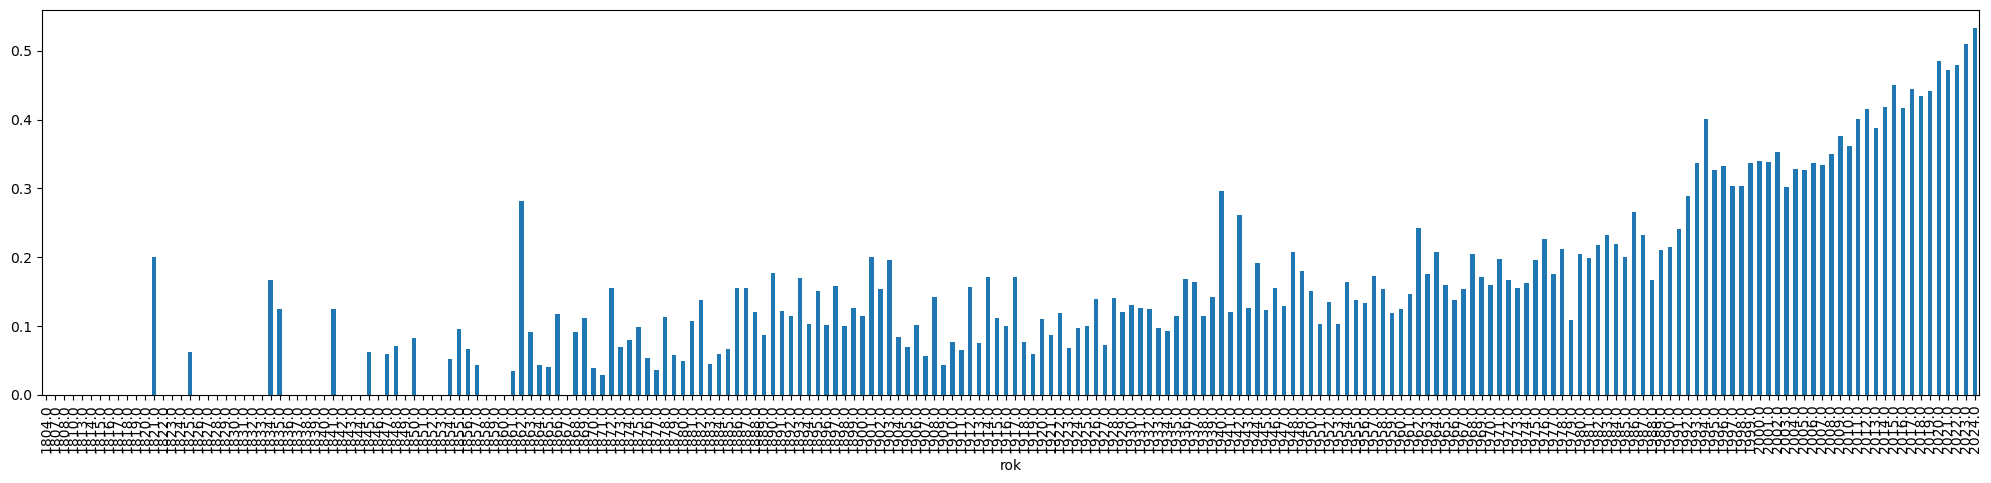

In [513]:
(df[df['gender'].isin(['á','f'])].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [474]:
kolikvyslo = df.groupby('rok').size()
kolikvyslo[kolikvyslo < 150].tail(1)

rok
1987.0    142
dtype: int64

In [554]:
(df[df['gender'].isin(['f','á'])].groupby('rok').size() / df[df['gender'].isin(['m','f','á','neá'])].groupby('rok').size()).tail(10)

rok
2015.0    0.449964
2016.0    0.416779
2017.0    0.444444
2018.0    0.434498
2019.0    0.441558
2020.0    0.484985
2021.0    0.472352
2022.0    0.479599
2023.0    0.509217
2024.0    0.532450
dtype: float64

In [476]:
(df[df['gender'] == 'f'].groupby('rok').size() / df[df['gender'].isin(['m','f'])].groupby('rok').size()).tail(10)

rok
2015.0    0.455484
2016.0    0.422902
2017.0    0.474374
2018.0    0.461446
2019.0    0.473274
2020.0    0.525196
2021.0    0.522478
2022.0    0.532875
2023.0    0.561762
2024.0    0.580762
dtype: float64

<Axes: xlabel='rok'>

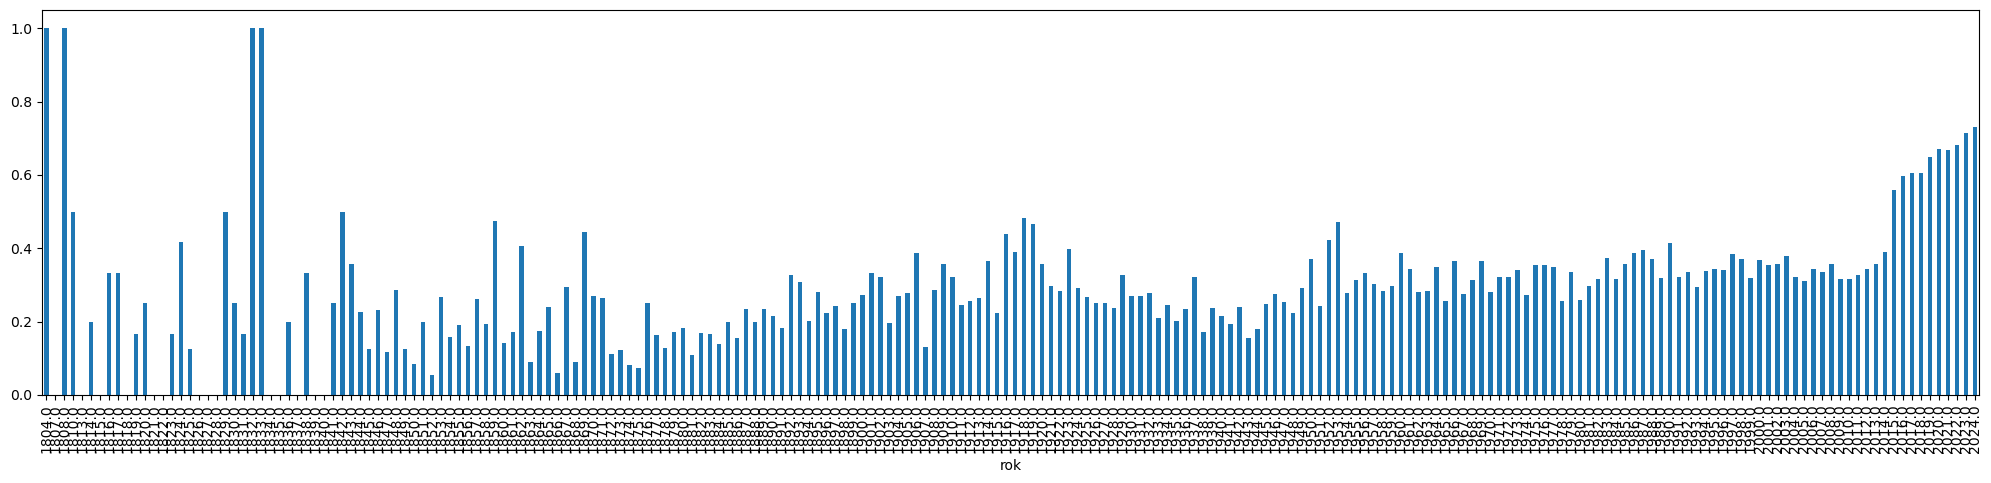

In [477]:
(df[df['gender'].isin(['m','f'])].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [482]:
df[(df['umrti'] < df['rok']) | (df['umrti'].isnull())].dropna(subset=['vek']).sort_values(by='vek',ascending=False)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20132447903,2013.0,"Opravdu, vstal z mrtvých!",Jan Zlatoústý,jn20011024076,None,None,[0347],[0407],[jn20011024076],"[Jan Zlatoústý,]",[asi 347-407],[0],None,None,None,None,None,None,None,None,None,None,"[Ióannés Chrýsostomos,, Johannes Chrysostomus,...","[asi 347-407, asi 347-407, asi 347-407, asi 34...",None,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0]",None,None,None,None,None,None,None,None,"[Patriarcha cařihradský, církevní učitel a spi...",[http://cs.wikipedia.org/wiki/Jan_Zlato%C3%BAs...,cz a22 n 4500,NaN,NaN,NaN,347.0,407.0,1666.0,neá
bknjaj05933,1835.0,Swatého Jeronyma kagjcj rozgjmánj o neyswětěgš...,Jeroným,jn19981001563,None,None,[0342],[0420],[jn19981001563],"[Jeroným,]",[asi 342-420],[0],None,None,None,[Česko],None,None,None,None,None,None,"[Gerolamo,, Hieronymus Sophronius Eusebius,, J...","[asi 342-420, asi 342-420, asi 342-420, asi 34...",None,"[0, 0, 0, 1, 0, 0, 0, 0]",None,None,None,None,None,None,None,None,"[Církevní učitel, kněz, latinský církevní spis...",None,cz a22 n 4500,NaN,NaN,NaN,342.0,420.0,1493.0,neá
cpk19960117599,1931.0,Dívčí válka,Dalimil,jk01021992,"[isni, wikidata]","[0000000055770820, Q1157937]",None,[1347],[jk01021992],"[Dalimil,]",[-asi 1347],[0],None,None,None,[Česko],None,None,None,None,None,None,"[Jindřich z Varnsdorfu,, Vilém Zajíc z Valdeka...","[-asi 1347, -asi 1347, -asi 1347]",None,"[0, 0, 1]",None,None,None,None,None,None,None,None,[Narozen asi ve druhé polovině 13. století. Šl...,None,cz a22 n 4500,Q1157937,1250.0,1400.0,1250.0,1347.0,681.0,neá
nkc20051306503,2006.0,Život svaté Alžběty,Štítný ze Štítného Tomáš,jn19981002480,None,None,[1333],[1409],[jn19981002480],"[Štítný ze Štítného, Tomáš,]",[asi 1333-asi 1409],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Tomáš ze Štítného,, <<ze >>Štítného, Tomáš,]","[asi 1333-asi 1409, asi 1333-asi 1409]",None,"[0, 1]",None,None,None,None,None,None,None,None,"[Narozen asi 1333 ze Štítného, zemřel 1409 v P...",None,cz a22 n 4500,NaN,NaN,NaN,1333.0,1409.0,673.0,neá
nkc20152722767,2015.0,Listy z Kostnice,Hus Jan,jk01043287,"[isni, wikidata]","[0000000118834634, Q43977]",[1371],[1415],[jk01043287],"[Hus, Jan,]",[asi 1371-1415],[1],None,"[Husinec, Prachatice, Česko]","[Kostnice, Německo]",[Česko],None,"[teologie, školství, reformace, literatura, li...",None,"[teologové, vysokoškolští učitelé, kazatelé, k...",[muž],"[cze, lat]","[Jan,, M. J. H.,, Mistr Jan Hus,, Constantius,...","[asi 1371-1415, asi 1371-1415, asi 1371-1415, ...","[None, None, None, Pseudonym:, None, None, Non...","[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen asi 1371 v Husinci u Prachatic, zemře...",[https://cs.wikipedia.org/wiki/Jan_Hus],cz a22 n 4500,Q43977,1369.0,1415.0,1371.0,1415.0,644.0,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20071748366,2007.0,"Pohádky postaviček, které chtějí poznat svět",Pelikánová Ester,jx20071106019,None,None,[2000],None,[jx20071106019],"[Pelikánová, Ester,]",[2000-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 6. 11. 2000 v Turnově. dětská autork...,None,cz a22 n 4500,NaN,NaN,NaN,2000.0,NaN,7.0,á
bkneli06814,1900.0,Vyvrženci,Prager Josef,jk01100877,None,None,[1893],None,[jk01100877],"[Prager, Josef,]",[1893-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 1.9.1893 v Praze. Strojník, prozaik, ...",None,nz a22 n 4500,NaN,NaN,NaN,1893.0,NaN,7.0,neá
nkc20172907907,1947.0,V 

In [483]:
df[df['vek'] > 110].sample(200)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20122341439,2012.0,Belhavý kůň,Choltický Jaroslav,jk01050312,None,None,[1869],[1955],[jk01050312],"[Choltický, Jaroslav,]",[1869-1955],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Janouch, František,]",[1869-1955],[Skutečné jméno:],[1],None,None,None,None,None,None,None,None,"[Narozen 1.12.1869 v Cholticích u Přelouče, ze...",None,nz a22 n 4500,NaN,NaN,NaN,1869.0,1955.0,143.0,neá
nos190113918,1923.0,"""Husité""",Herloßsohn Karl,jo20000080503,None,None,[1802],[1849],[jo20000080503],"[Herloßsohn, Karl,]",[1802-1849],[1],None,"[Praha, Česko]","[Lipsko, Německo]","[Česko, Německo]",None,"[literatura, žurnalistika]",None,"[spisovatelé, novináři]",[muž],[ger],"[Clauren, Heinrich,, Forstmann, Eduard,, Halta...","[1802-1849, 1802-1849, 1802-1849, 1802-1849, 1...","[None, None, None, None, None, None, None, Non...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",None,None,None,None,None,None,None,None,[Německý novinář a spisovatel spjatý s českým ...,[https://cs.wikipedia.org/wiki/Karl_Herlo%C3%9...,cz a22 n 4500,NaN,NaN,NaN,1802.0,1849.0,121.0,m
nkc20051631907,2005.0,Anna Pammrová - životopis,Křemenová Alma,ola200204105,None,None,[1890],[1971],[ola200204105],"[Křemenová, Alma,]",[1890-1971],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 04.02.1890 Koryňovka (Ukrajina), zem...",None,nz a22 n 4500,NaN,NaN,NaN,1890.0,1971.0,115.0,á
bk196501530,1965.0,Obrázky,Neruda Jan,jk01083209,"[isni, wikidata]","[0000000121298019, Q156321]",[1834],[1891],[jk01083209],"[Neruda, Jan,]",[1834-1891],[1],None,"[Praha, Česko]","[Praha, Česko]",[Česko],None,"[žurnalistika, literatura, drama, literární kr...",None,"[novináři, básníci, spisovatelé, dramatici, li...",[muž],"[cze, ger, fre]","[Hovora, Janko,, Neruda, Yan,, Nieluda, Yang,,...","[1834-1891, 1834-1891, 1834-1891, 1834-1891, 1...","[Pseudonym:, None, None, None, None]","[1, 1, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 9. 7. 1834 v Praze, zemřel 22. 8. 189...",[https://cs.wikipedia.org/wiki/Jan_Neruda],cz a22 n 4500,Q156321,1834.0,1891.0,1834.0,1891.0,131.0,m
bk196603337,1966.0,Rozina sebranec a jiné prózy,Winter Zikmund,jk01151722,None,None,[1846],[1912],[jk01151722],"[Winter, Zikmund,]",[1846-1912],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 27.12.1846 v Praze, zemřel 12.6.1912 ...",None,cz a22 n 4500,NaN,NaN,NaN,1846.0,1912.0,120.0,neá
cpk19990656460,1960.0,Dozvuky,Stašek Antal,jk01120951,None,None,[1843],[1931],[jk01120951],"[Stašek, Antal,]",[1843-1931],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Tomeš,, Zeman, Antonín,]","[1843-1931, 1843-1931]","[Pseudonym:, Skutečné jméno:]","[0, 1]",None,None,None,None,None,None,None,None,[Narozen 22.7.1843 ve Stanovém u Vysokého nad ...,None,nz a22 n 4500,NaN,NaN,NaN,1843.0,1931.0,117.0,neá
nkc20071748871,2007.0,Ze života českých poustevníků,Tomek Vratislav Václav,jk01132710,None,None,[1868],[1933],[jk01132710],"[Tomek, Vratislav Václav,]",[1868-1933],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Bohutinský, Eugen,, Hron, Bedřich,]","[1868-1933, 1868-1933]","[Pseudonym:, Pseudonym:]","[1, 1]",None,None,None,None,None,None,None,None,"[Narozen 22.2.1868 v Bohutíně u Příbrami, zemř...",None,nz a22 n 4500,NaN,NaN,NaN,1868.0,1933.0,139.0,neá
nkc20081834280,2008.0,Sůl nad zlato,Němcová Božena,jk01083016,"[isni, wikidata]","[0000000121343289, Q157970]",[1820],[1862],[jk01083016],"[Němcová, Božena,]",[1820-1862],[1],None,"[Vídeň, Rakousko]","[Praha, Česko]",[Česko],None,"[česká literatura, národní o

## Explorace: věk

<Axes: xlabel='vek'>

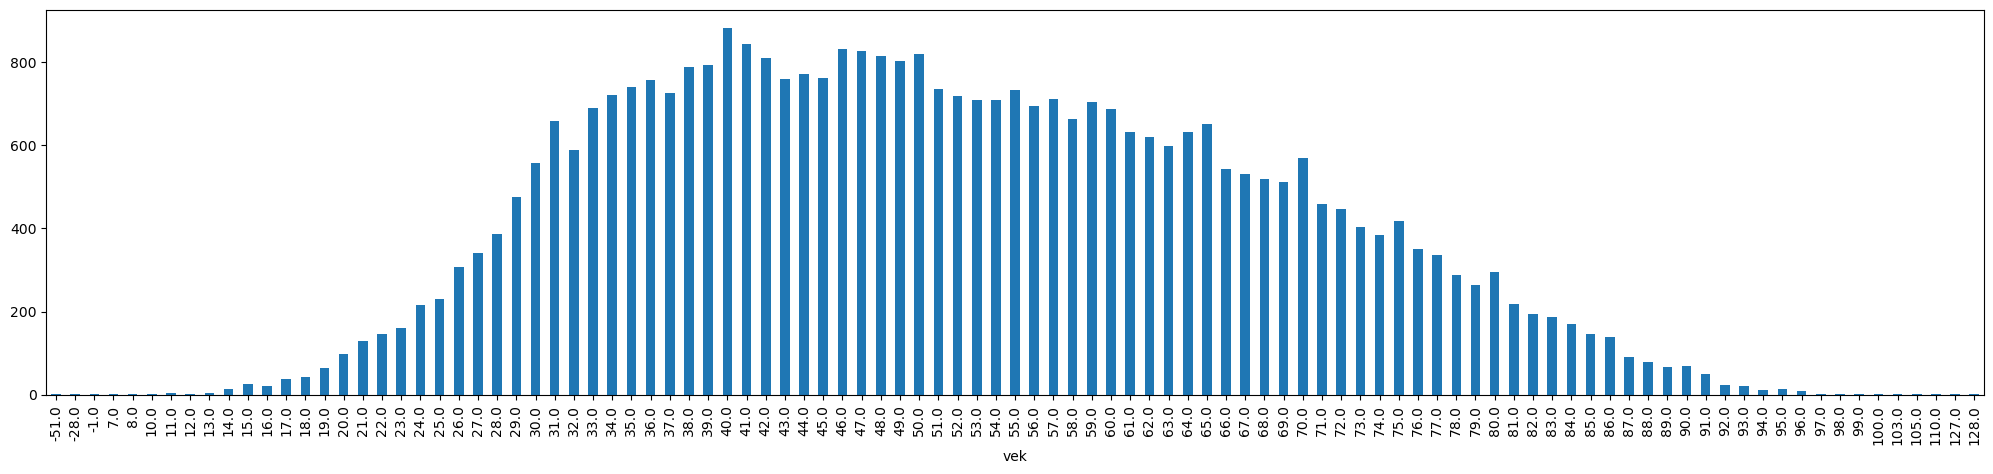

In [484]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())].groupby('vek').size().plot.bar(figsize=(25,5))

In [485]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())]['vek'].median()

50.0

<Axes: xlabel='vek'>

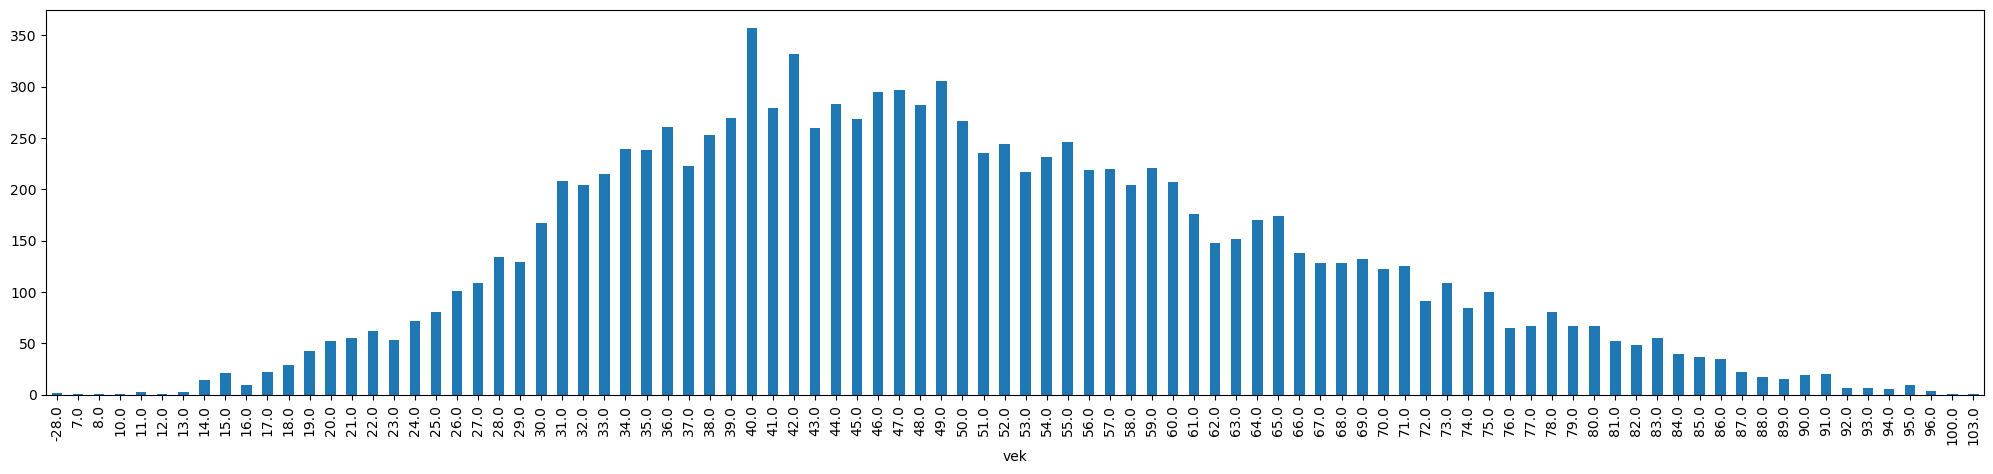

In [506]:
df[((df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())) & (df['gender'].isin(['f','á'])) ].groupby('vek').size().plot.bar(figsize=(25,5))

In [487]:
davne_autorstvo = df[df['rok'] < 1980]['autorstvo_kod'].drop_duplicates().to_list()
df2 = df[~df['autorstvo_kod'].isin(davne_autorstvo)]

In [488]:
df2

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk198101033,1980.0,Zborcení města,Košek Zdeněk,jk01062044,None,None,[1922],None,[jk01062044],"[Košek, Zdeněk,]",[1922-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen v lednu 1922. PhDr., redaktor, prózy ...",None,nz a22 n 4500,NaN,NaN,NaN,1922.0,NaN,58.0,neá
nkc20092012744,1980.0,Pachatel je ozbrojen,Lipert Bohumil,jn20001103417,None,None,None,[2005],[jn20001103417],"[Lipert, Bohumil,]",[-2005],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Zemřel 2005. Autor detektivních a kriminálníc...,None,cz a22 n 4500,NaN,NaN,NaN,NaN,2005.0,NaN,neá
bk198101967,1980.0,Jak jsem bránil přírodu,Velek Josef,jk01141961,None,None,[1939],[1990],[jk01141961],"[Velek, Josef,]",[1939-1990],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 30.11.1939 v Klínci u Davle, zemřel 3...",None,nz a22 n 4500,NaN,NaN,NaN,1939.0,1990.0,41.0,neá
bk198001434,1980.0,Seno ve vlasech,Procházková Marta,jk01101254,None,None,[1945],None,[jk01101254],"[Procházková, Marta,]",[1945-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 15.8.1945 v Praze. Prozaička, překla...",None,nz a22 n 4500,NaN,NaN,NaN,1945.0,NaN,35.0,á
bk198002295,1980.0,Vesmíru podali jsme šeřík,Mynaříková Zdena,jk01082589,None,None,None,None,[jk01082589],"[Mynaříková, Zdena]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Editorka souboru jihočeských básníků.],None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,á
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243601079,2024.0,Fušeři,Holub Metoděj,xx0316528,[wikidata],[Q125689391],[1977],None,[xx0316528],"[Holub, Metoděj,]",[1977-],[1],None,None,None,[Česko],"[Brno, Česko]","[literární tvorba, obchod]",None,[manažeři],[muž],[cze],"[Křepelka, Mikuláš,]",[1977-],[Skutečné jméno:],[1],None,None,None,None,None,None,None,None,[Narozen 27. 2. 1977. Autor humoristické knihy...,None,cz a22 n 4500,Q125689391,1977.0,NaN,1977.0,NaN,47.0,m
nkc20243601181,2024.0,Slon v šuplíku,Nejedlý Jan,ola2003165587,None,None,[1971],None,[ola2003165587],"[Nejedlý, Jan,]",[1971-],[1],None,"[Praha, Česko]",None,[Česko],None,"[školství, literatura, žurnalistika, redakční ...",None,"[pedagogové, spisovatelé, básníci, novináři, r...",[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 19. 3. 1971 v Praze. Pedagog, spisova...",None,cz a22 n 4500,NaN,NaN,NaN,1971.0,NaN,53.0,m
nkc20243601189,2024.0,Kampak jedou Pepa s Edou?,Hegerová Vendula,ola2003204967,"[isni, wikidata]","[0000000058292561, Q95155488]",[1976],None,[ola2003204967],"[Hegerová, Vendula,]",[1976-],[1],None,"[Vysoké Mýto, Česko]",None,[Česko],"[Vysoké Mýto, Česko]","[ilustrace, literatura pro děti a mládež, design]",None,"[ilustrátorky, designérky]",[žena],None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 23. 3. 1976 ve Vysokém Mýtě. Ilustrá...,None,cz a22 n 4500,NaN,NaN,NaN,1976.0,NaN,48.0,f


## Explorace: věk + gender

In [556]:
veky_muzu = df2[((df2['rok'] <= df2['umrti']) | (df2['narozeni'].notnull() & df2['umrti'].isnull())) & (df2['gender'].isin(['m'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

In [558]:
veky_zen = df2[((df2['rok'] <= df2['umrti']) | (df2['narozeni'].notnull() & df2['umrti'].isnull())) & (df2['gender'].isin(['f','á'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

In [492]:
import matplotlib.pyplot as plt 

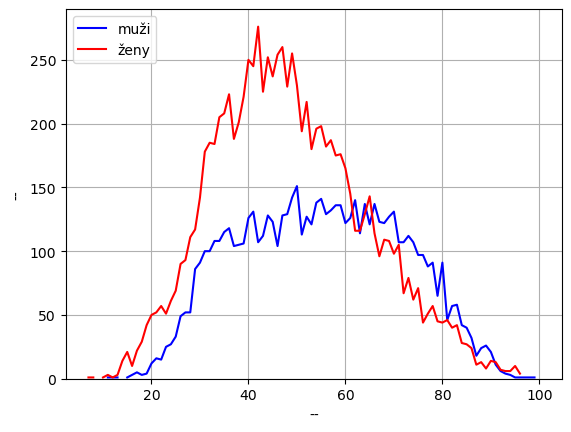

In [560]:
plt.plot(veky_muzu, color="blue", label="muži")
plt.plot(veky_zen, color="red", label="ženy")
plt.ylim(ymin=0)
plt.xlabel("--")
plt.ylabel("--")
plt.legend()
plt.legend(loc = "upper left")
plt.grid(True, which="both")
plt.show()

In [494]:
df.sort_values(by='vek').head(30)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknjms02100,1889.0,Z přírody,Doubek František,jk01022862,None,None,[1940],[2011],[jk01022862],"[Doubek, František,]",[1940-2011],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 21. 4. 1940 v Milevsku, zemřel 11. 12...",None,cz a22 n 4500,NaN,NaN,NaN,1940.0,2011.0,-51.0,neá
bk197201252,1972.0,V hudbě život,Kadlecová Marie Magdalena,jk01052463,"[isni, wikidata]","[0000000055603432, Q15928217]",None,None,[jk01052463],"[Kadlecová, Marie Magdalena]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Beletristka, autorka knih pro děti a biografi...",None,cz a22 n 4500,Q15928217,2000.0,NaN,2000.0,NaN,-28.0,á
bknhra07814,1928.0,Na zapřenou,Sedláčková Anna,mzk2005274887,None,None,[1956],None,[mzk2005274887],"[Sedláčková, Anna,]",[1956-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 1956. Ing., knihovnice, autorka bibl...",None,nz a22 n 4500,NaN,NaN,NaN,1956.0,NaN,-28.0,á
cpk20000529314,1875.0,Mařenka,Andrle František,jk01010286,None,None,[1876],[1937],[jk01010286],"[Andrle, František,]",[1876-1937],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.9.1876 v Hoříněvsi u Hradce Králov...,None,nz a22 n 4500,NaN,NaN,NaN,1876.0,1937.0,-1.0,neá
cpk20000529316,1875.0,Tři stužky,Andrle František,jk01010286,None,None,[1876],[1937],[jk01010286],"[Andrle, František,]",[1876-1937],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.9.1876 v Hoříněvsi u Hradce Králov...,None,nz a22 n 4500,NaN,NaN,NaN,1876.0,1937.0,-1.0,neá
nkc20172907907,1947.0,V táboře pod Malinovou horou,Lev František,xx0000991,None,None,[1948],None,[xx0000991],"[Lev, František,]",[1948-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.6.1948. Autor pověstí a legend.],None,nz a22 n 4500,NaN,NaN,NaN,1948.0,NaN,-1.0,neá
nkc20071748366,2007.0,"Pohádky postaviček, které chtějí poznat svět",Pelikánová Ester,jx20071106019,None,None,[2000],None,[jx20071106019],"[Pelikánová, Ester,]",[2000-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 6. 11. 2000 v Turnově. dětská autork...,None,cz a22 n 4500,NaN,NaN,NaN,2000.0,NaN,7.0,á
bkneli06814,1900.0,Vyvrženci,Prager Josef,jk01100877,None,None,[1893],None,[jk01100877],"[Prager, Josef,]",[1893-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 1.9.1893 v Praze. Strojník, prozaik, ...",None,nz a22 n 4500,NaN,NaN,NaN,1893.0,NaN,7.0,neá
nkc20172895241,2017.0,Jak pejsek a kočička pěstovali buřty,Bílá Viola Zoe,jo2017972267,None,None,[2009],None,[jo2017972267],"[Bílá, Viola Zoe,]",[2009-],[1],None,None,None,[Česko],"[Červený Kostelec, Česko]","[ilustrace, dětské písně]",None,None,[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 8. 12. 2009. Autorka ilustrací a pís...,None,nz a22 n 4500,NaN,NaN,NaN,2009.0,NaN,8.0,f


In [495]:
df.groupby('autorstvo')['autorstvo_kod'].nunique().nlargest()

autorstvo
Svoboda Jiří         5
Černý Karel          5
Fiala Václav         4
Novotný František    4
Novák Jaroslav       4
Name: autorstvo_kod, dtype: int64

In [496]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())].sample(50)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk194002244,1940.0,"Milča, princezna z lesů",Marešová Eva,jo2008475985,None,None,[1900],[1971],[jo2008475985],"[Marešová, Eva,]",[1900-1971],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Zíka, Vladislav,, Zíka, Vláďa,, Bobbin, Georg...","[Pseudonym:, Pseudonym:, Pseudonym:, Pseudonym...","[1, 1, 1, 1, 1, 1, 1]",None,"[Narozen 21. 7. 1900 v Praze, zemřel 6. 10. 19...",[http://cs.wikipedia.org/wiki/Vladim%C3%ADr_Wa...,cz a22 n 4500,NaN,NaN,NaN,1900.0,1971.0,40.0,á
nkc20243592251,2024.0,Pouto krve,Mašková Eva,xx0273981,[wikidata],[Q112762753],[1958],None,[xx0273981],"[Mašková, Eva,]",[1958-],[1],None,"[Praha, Česko]",None,[Česko],"[Praha, Česko]","[účetnictví, finanční management, mediace, lek...",[American College Counseling Association],"[ekonomky, lektorky (vzdělávání), mediátorky, ...",[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 25. 4. 1958 v Praze. Specialistka na...,None,cz a22 n 4500,Q112762753,1958.0,NaN,1958.0,NaN,66.0,f
nos190126160,1912.0,Slet v pekle,Kutina Jan,jk01071105,None,None,[1883],[1972],[jk01071105],"[Kutina, Jan,]",[1883-1972],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Liptovský, Miluš,]",[Pseudonym:],[1],None,"[Narozen 1.11.1883 v Opřeticích u Benešova, ze...",None,cz a22 n 4500,NaN,NaN,NaN,1883.0,1972.0,29.0,neá
nkc20051578327,2005.0,Smrt zeměměřiče,Slavíček Jiří,mzk2005295078,None,None,[1942],None,[mzk2005295078],"[Slavíček, Jiří,]",[1942-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literatura, detektivní literatura, literatura...",None,[spisovatelé],[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 30. 7. 1942 v Praze. Spisovatel, auto...",[https://cs.wikipedia.org/wiki/Ji%C5%99%C3%AD_...,cz a22 n 4500,NaN,NaN,NaN,1942.0,NaN,63.0,m
cpk20041292986,2003.0,Kde čtyřlístky nerostou,Dědková Jarmila,jk01022157,None,None,[1952],None,[jk01022157],"[Dědková, Jarmila,]",[1952-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 23.3.1952 v Brně. PhDr., pedagožka a...",None,cz a22 n 4500,NaN,NaN,NaN,1952.0,NaN,51.0,á
nkc20213330170,2021.0,Amáliina nehybnost,Rudčenková Kateřina,jn20000402142,"[isni, wikidata]","[0000000116513378, Q12028956]",[1976],None,[jn20000402142],"[Rudčenková, Kateřina,]",[1976-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literární tvorba, poezie, drama, fotografován...",None,"[spisovatelky, básnířky, dramatičky, publicist...",[žena],[cze],"[Rudčenkova, Kateržina,]",[1976-],None,[1],None,None,None,None,None,None,None,None,"[Narozena 12. 4. 1976 v Praze. Básnířka, drama...",None,cz a22 n 4500,Q12028956,1976.0,NaN,1976.0,NaN,45.0,f
nkc20223472658,2022.0,Červi v hlavě,Novotná Karin,xx0255507,None,None,[1992],None,[xx0255507],"[Novotná, Karin,]",[1992-],[1],None,"[Brno, Česko]",None,[Česko],"[Náměšť nad Oslavou, Česko]","[literatura, literární činnost, redakční práce...",None,"[redaktorky, blogerky, editorky]",[žena],[cze],"[Ghisiová, Karin,]",[1992-],[Rodné jméno:],[1],None,None,None,None,None,None,None,None,"[Narozena 1992 v Brně. Redaktorka, editorka a ...",None,cz a22 n 4500,NaN,NaN,NaN,1992.0,NaN,30.0,f
nkc20152686253,2015.0,Vynálezce Tadeáš,Pospíšilová Zuzana,mzk2006331486,None,None,[1975],None,[mzk2006331486],"[Pospíšilová, Zuzana,]",[1975-],[1],None,None,None,[Česko],None,"[psychologie, dětská literatura, překladatelství]",None,"[psycholožky, spisovatelky]",[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 7. 9. 1975. Dětská psycholožka, spis...",None,cz a22 n